In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scanpy as sc
import seaborn as sns

import tissue.api as tissue

/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Data Loading

In [63]:
data_origin = 'metabric'
data_path = '/storage/groups/ml01/workspace/david.fischer/tissue/data/metabric/'
results_path = '/mnt/home/icb/sabrina.richter/git/testruns/'
model_id = 'gcn'

trainer = tissue.train.TrainModelGCN()
trainer.init_estim()
trainer.estimator.get_data(
    data_origin=data_origin,
    data_path=data_path,
    radius=50,
    target_label='grade',
    node_supervision=False,
    graph_label_selection=[],
    graph_covar_selection=[],
    node_label_space_id='standard',
    adj_type=None,
    drop_when_missing=[],
#     self_supervision=True,
    self_supervision=False,
)

Loading data from raw files
registering celldata


/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


Trying to set attribute `.uns` of view, copying.
100%|██████████| 500/500 [00:15<00:00, 32.61it/s]


Loaded 500 images with complete data from 454 patients over 464615 cells with 39 cell features and 9 distinct celltypes.
500
500
454
454
454

Whole dataset: 500 images from 454 patients.
Test dataset: 48 images from 45 patients.
Training dataset: 405 images from 368 patients.
Validation dataset: 47 images from 41 patients.



### Model Training

In [11]:
data_origin = 'schuerch'
data_path = '/storage/groups/ml01/workspace/david.fischer/tissue/data/schuerch/'
results_path = '/mnt/home/icb/sabrina.richter/git/testruns/'
model_id = 'gcn'

trainer = tissue.train.TrainModelGCN()
trainer.init_estim()
trainer.estimator.get_data(
    data_origin=data_origin,
    data_path=data_path,
    radius=50,
    target_label='Group',
    node_supervision=False,
    graph_label_selection=['DFS', 'LA', 'CLR_Graham_Appelman'],
    graph_covar_selection=['Diffuse', 'Klintrup_Makinen'],
    node_label_space_id='type',
    adj_type=None,
    drop_when_missing=['Group'],
#     self_supervision=True,
    self_supervision=False,
)
trainer.estimator.init_model(
#     depth_feature_embedding=2,
    depth_feature_embedding=0,
#     add_covar_at_nodes=True,
#     add_covar_at_embedding=True,
    loss_weight_others=0.1,
    loss_weight_types=1,
    use_gcnii_layer=False,
)
trainer.estimator.train(epochs=2)
trainer.save(results_path+model_id, save_weights=True)

Loading data from raw files
registering celldata


/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


collecting image-wise celldata


/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
  0%|          | 0/140 [00:00<?, ?it/s]

adding graph-level covariates


100%|██████████| 140/140 [00:07<00:00, 19.00it/s]


Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 21 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 112 images from 28 patients.
Validation dataset: 12 images from 3 patients.



### Model Interpretation

In [4]:
data_path = '/storage/groups/ml01/workspace/david.fischer/tissue/data/schuerch/'
results_path = '/mnt/home/icb/sabrina.richter/git/testruns/'
model_id = 'gcn'
model_class = 'GCN'

interpreter = tissue.fits.InterpreterGraph(
    results_path=results_path,
    model_id=model_id,
    model_class=model_class,
)
interpreter.get_data_again(data_path=data_path)
interpreter.load_model()

Loading data from raw files
registering celldata


/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


collecting image-wise celldata


/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/sabrina.richter/miniconda3/envs/tissue/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
  0%|          | 0/140 [00:00<?, ?it/s]

adding graph-level covariates


100%|██████████| 140/140 [00:07<00:00, 19.18it/s]


Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 21 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 112 images from 28 patients.
Validation dataset: 12 images from 3 patients.



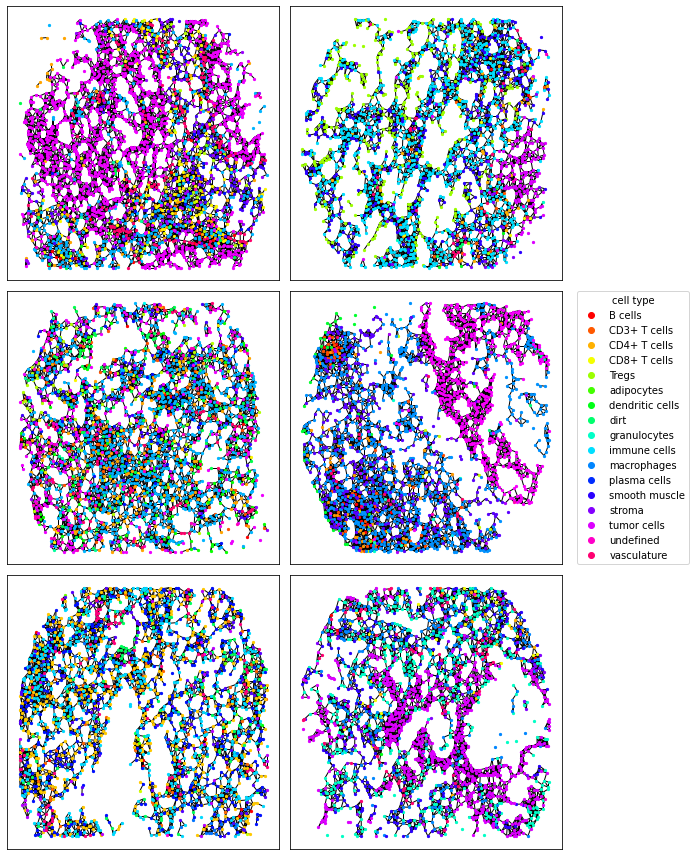

In [5]:
interpreter.plot_graph(
    image_key=[['reg029_A', 'reg029_B'], ['reg030_A', 'reg030_B'], ['reg034_A', 'reg034_B']],
    panel_width=4.,
    panel_height=4.,
    edge_width=1,
    node_size=5,
)

/home/icb/sabrina.richter/git/tissue/tissue/interpretation/interpreter.py:335: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  labels = list(np.array(labels)[[[l in label_names for l in labels]]])


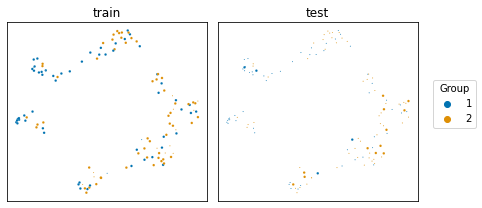

In [6]:
interpreter.plot_umap_graphs(
    layer_name='final_dense_0',
    label='Group',
    partitions=['train', 'test'],
    embedding_method='umap',
)

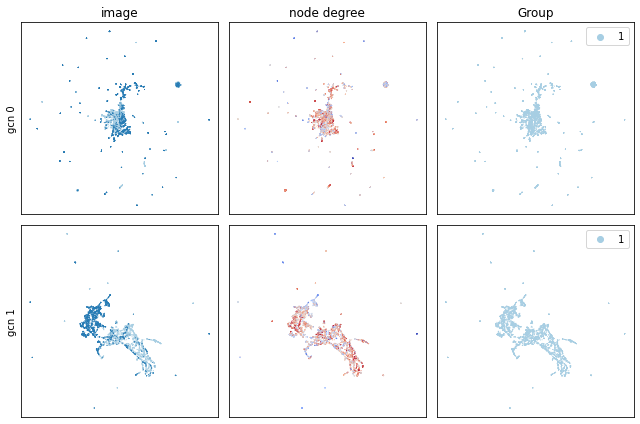

In [7]:
interpreter.plot_umap_nodes(
    idx=['reg029_A', 'reg029_B'],
    layer_names=['Layer_gcn_0', 'Layer_gcn_1'],
#     layer_names=['input', 'Layer_dense_feature_embedding_0', 'Layer_gcn_0'],
    plot_types=['images', 'degree', 'Group'],
)


/home/icb/sabrina.richter/git/tissue/tissue/interpretation/interpreter.py:1005: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_label_position('top')
/home/icb/sabrina.richter/git/tissue/tissue/interpretation/interpreter.py:1014: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Save, show and return figure.


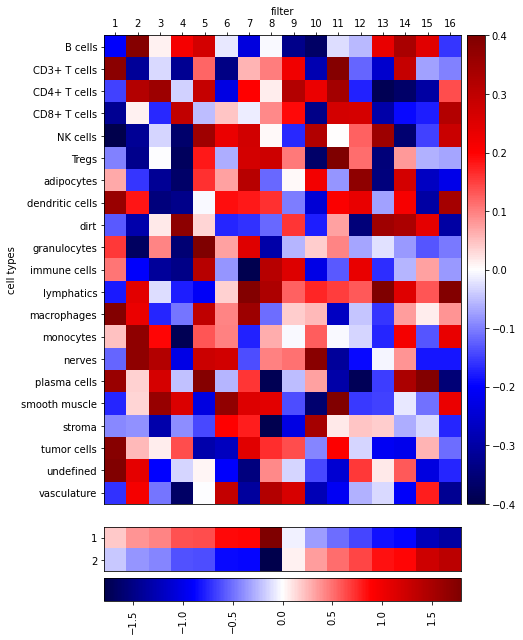

In [59]:
interpreter.plot_weight_matrix(
    layer_name='Layer_gcn_0',
    target_label='Group',
)